In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
PATH = './pro_data/'
df = pd.read_csv(PATH+"pro.titanic.csv")



In [17]:
data = df.values
def split_train_test(data,test_ratio):
    np.random.seed(1)
    randomlist = np.random.permutation(len(data))
    test_set_size = round(int(len(data)) * test_ratio) # 测试集的大小
    test=data[:test_set_size,:]
    train= data[test_set_size:,:]
    return test,train

test,data = split_train_test(data,0.2)
x_data = data[:,1:]
y_data = data[:,1]
print(x_data.shape)
print(x_data.shape[0])
X_data=np.concatenate((np.ones((x_data.shape[0],1)),x_data),axis=1)

x_test = test[:,1:]
y_test = test[:,1]
print(X_data)
print(y_data.shape)
y_data = y_data.reshape(713,1)

(713, 8)
713
[[1.         0.         2.         ... 0.         0.02537431 2.        ]
 [1.         0.         3.         ... 0.         0.         2.        ]
 [1.         0.         3.         ... 2.         0.13575256 2.        ]
 ...
 [1.         0.         3.         ... 2.         0.04577135 2.        ]
 [1.         1.         1.         ... 0.         0.0585561  1.        ]
 [1.         0.         3.         ... 0.         0.01512699 3.        ]]
(713,)


In [33]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def cost(xMat,yMat,ws):
    return np.sum((np.multiply(yMat,np.log(sigmoid(xMat*ws)))+np.multiply(1-yMat,np.log(1-sigmoid(xMat*ws)))))/-(len(xMat))


ws = np.random.randn(9,1)
def gradAscent(X_data,y_data,ws):
    xMat = np.mat(X_data)  # 转化为矩阵
    yMat = np.mat(y_data)
    lr = 0.001   # 设置学习率和迭代次数
    epochs = 1000
    costList = []  # 每迭代50次 记录代价函数
    m,n = np.shape(xMat)
 # 初始化权重
    for i in range(epochs+1):
        h = sigmoid(np.dot(xMat,ws))
        ws_grad = np.dot((xMat.T),(h-yMat))/m  
        
        ws = ws-lr*ws_grad  # 更新权重
        if i%50==0:
            costList.append(cost(xMat,yMat,ws))
    return ws,costList
ws,costList=gradAscent(X_data,y_data,ws)
print(ws)

[[ 0.34480291]
 [ 0.36460692]
 [-0.51218064]
 [-0.95884306]
 [-1.86917515]
 [ 1.10971785]
 [-0.40703011]
 [-1.65495879]
 [ 0.75429273]]


In [34]:
print(ws.shape)
print(costList)

(9, 1)
[1.4837166061989742, 1.3492954583720587, 1.231280936752948, 1.1295689036124734, 1.043324963645717, 0.9711570888976478, 0.9113494137559841, 0.8620856578783349, 0.8216176436811847, 0.7883671743365028, 0.7609711909391893, 0.7382879613409907, 0.7193809860119279, 0.7034928145974053, 0.6900163400077579, 0.6784676258643891, 0.668462059102435, 0.659694324289958, 0.6519220382868149, 0.6449526023561363, 0.6386327504353115]


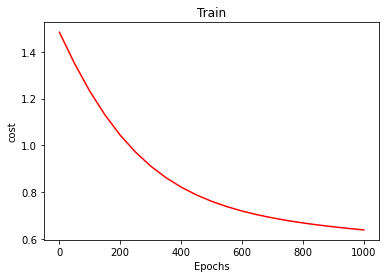

In [38]:
x=np.linspace(0,1000,21)
plt.plot(x,costList,c='r')
plt.title('Train')
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.show()

In [40]:

def predict(x_test,y_test,ws):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(x_test.shape[0]):
        xMat = np.mat(test[i])
        ws = np.mat(ws)
        if (xMat*ws)>0:
            result = 1
        else:
            result = 0
            
        if y_test[i] == 1 and result ==1:
            TP += 1
        if y_test[i] == 0 and result ==0:
            TN += 1            
        if y_test[i] == 0 and result ==1:
            FP += 1    
        if y_test[i] == 1 and result ==0:
            FN += 1  

    
    R = TP / (TP + FN)
    P = TP / (TP + FP)
    Acc = (TP + TN) / (TP + TN + FP + FN)
    F1 = 2 * P * R / (P + R)
    print(TP,TN,FP,FN)
    print(Acc,R,P,F1)

    TPR = TP/(TP + FN)   # TPR其实就是查全率hhh
    FPR = FP/(FP + TN)   # 假正例率
    
    return TPR,FPR
predict(x_test,y_test,ws)
# 正确率十分堪忧

59 2 117 0
0.34269662921348315 1.0 0.3352272727272727 0.502127659574468


(1.0, 0.9831932773109243)

0.33146067415730335
AUC :  0.4


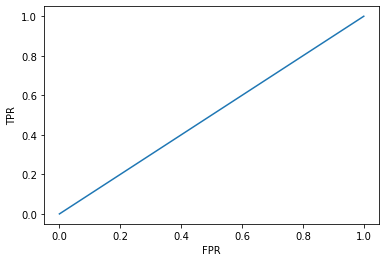

In [37]:
TPR_list = [] #ROC 的纵坐标 真阳率
FPR_list = [] #ROC 的横坐标 假正率
threshold = 0.3  #阈值从0.3开始~~
while threshold < 0.7: # 设置阈值
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(x_test.shape[0]):
        xMat = np.mat(test[i])
        ws = np.mat(ws)
        if sigmoid(xMat*ws).all()>threshold:
            result = 1
        else:
            result = 0
            
        if y_test[i] == 1 and result ==1:
            TP += 1
        if y_test[i] == 0 and result ==0:
            TN += 1            
        if y_test[i] == 0 and result ==1:
            FP += 1    
        if y_test[i] == 1 and result ==0:
            FN += 1 
            
        
        
    FPR = FP / (FP + TN)
    TPR = TP / (TP + FN)
    TPR_list.append(TPR)
    FPR_list.append(FPR)
        
    threshold += 0.005
        
Acc = (TP + TN) / (TP + TN + FP + FN)
print(Acc)
        
    #作图   
plt.figure()
plt.plot(FPR_list, TPR_list, color='green')  
plt.plot([0, 1], [0, 1])   # 这图让我迷惑

plt.xlabel('FPR')
plt.ylabel('TPR')

AUC = 0;
for i in range(0,len(TPR_list)):
    AUC += 0.005 * TPR_list[i];
        
print("AUC : ", round(AUC,3));    

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import linear_model

In [42]:
logistic=linear_model.LogisticRegression()#直接调用了这个方法？?
logistic.fit(x_data,y_data)#调用了fit方法

C:\Users\86189\python2\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [43]:
predictions=logistic.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       119
         1.0       1.00      1.00      1.00        59

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

